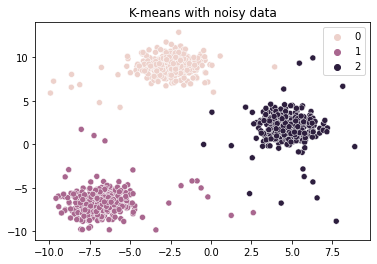

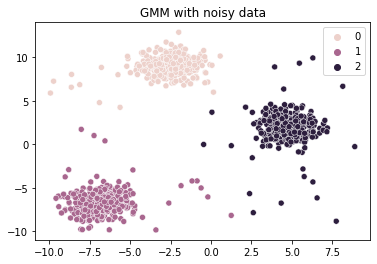

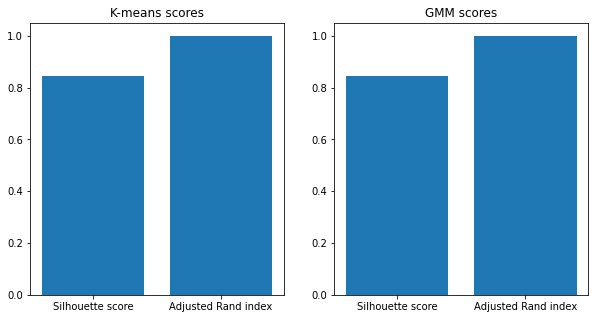

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Step 2: Implement K-means and GMM
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Step 3: Evaluate robustness
# Add noise to the data
X_noisy = np.vstack((X, np.random.uniform(low=-10, high=10, size=(50, 2))))
y_noisy = np.hstack((y, np.full((50,), -1, dtype=int)))

# Re-run K-means and GMM on noisy data
kmeans_noisy = KMeans(n_clusters=3, random_state=42)
kmeans_noisy_labels = kmeans_noisy.fit_predict(X_noisy)

gmm_noisy = GaussianMixture(n_components=3, random_state=42)
gmm_noisy_labels = gmm_noisy.fit_predict(X_noisy)

# Step 4:利用sc来检测accuracy
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_rand = adjusted_rand_score(y, kmeans_labels)

gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_rand = adjusted_rand_score(y, gmm_labels)

# Step 5: Visualize
sns.scatterplot(x=X_noisy[:, 0], y=X_noisy[:, 1], hue=kmeans_noisy_labels)
plt.title('K-means with noisy data')
plt.show()

sns.scatterplot(x=X_noisy[:, 0], y=X_noisy[:, 1], hue=gmm_noisy_labels)
plt.title('GMM with noisy data')
plt.show()

# Create bar charts to compare evaluation metrics
metrics = ['Silhouette score', 'Adjusted Rand index']
kmeans_scores = [kmeans_silhouette, kmeans_rand]
gmm_scores = [gmm_silhouette, gmm_rand]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(metrics, kmeans_scores)
axs[0].set_title('K-means scores')
axs[1].bar(metrics, gmm_scores)
axs[1].set_title('GMM scores')
plt.show()


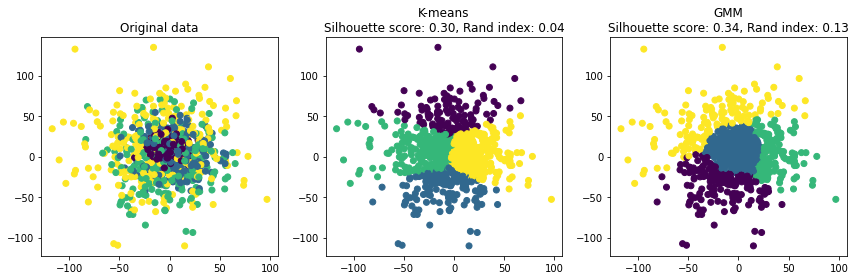

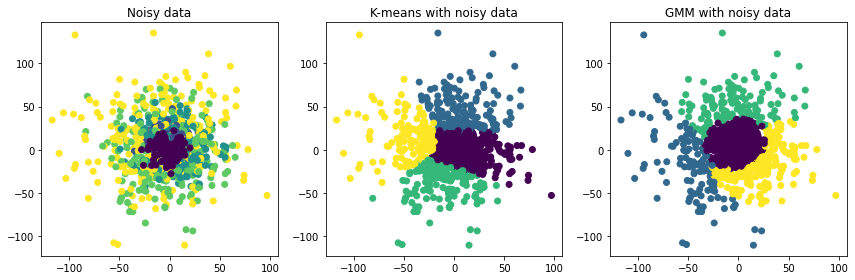

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Generate
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=[10, 20, 30, 40], random_state=42)

# Add noise
noise = np.random.normal(loc=0, scale=10, size=(100, 2))
X_noisy = np.vstack((X, noise))
y_noisy = np.hstack((y, np.full((100,), -1, dtype=int)))

# Implement K-means and GMM
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)

# robustness
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
kmeans_noisy_labels = kmeans_noisy.fit_predict(X_noisy)

gmm_noisy = GaussianMixture(n_components=4, random_state=42)
gmm_noisy_labels = gmm_noisy.fit_predict(X_noisy)

# accuracy
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_rand = adjusted_rand_score(y, kmeans_labels)

gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_rand = adjusted_rand_score(y, gmm_labels)

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title(
    f'K-means\nSilhouette score: {kmeans_silhouette:.2f}, Rand index: {kmeans_rand:.2f}')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels)
plt.title(
    f'GMM\nSilhouette score: {gmm_silhouette:.2f}, Rand index: {gmm_rand:.2f}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy)
plt.title('Noisy data')

plt.subplot(1, 3, 2)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=kmeans_noisy_labels)
plt.title('K-means with noisy data')

plt.subplot(1, 3, 3)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=gmm_noisy_labels)
plt.title('GMM with noisy data')

plt.tight_layout()
plt.show()

# Create bar charts to compare evaluation metrics (continued)
axs[0].set_title('K-means scores')
axs[1].bar(metrics, gmm_scores)
axs[1].set_title('GMM scores')
plt.show()


    Overlapping and non-spherical clusters: The second dataset has clusters that overlap and are not spherical in shape, which makes it harder for clustering algorithms to accurately separate the data into distinct clusters.

    Unequal cluster sizes and densities: The second dataset has clusters with different sizes and densities, which further complicates the task of clustering algorithms to accurately identify the clusters.

    Presence of noise: The second dataset includes additional noise points that are not part of any of the clusters, which makes it harder for clustering algorithms to identify the true clusters.

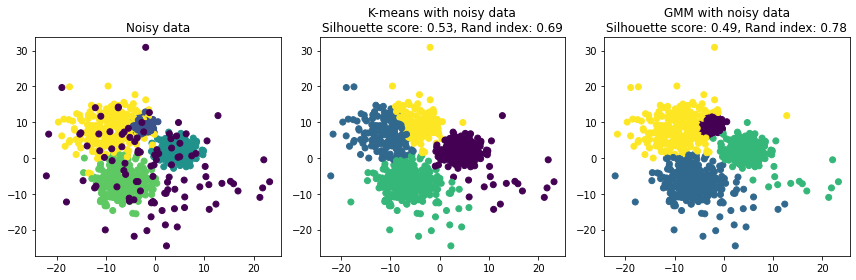

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=[
                  1, 2, 3, 4], random_state=42)

# Add noise to the data
noise = np.random.normal(loc=0, scale=10, size=(100, 2))
X_noisy = np.vstack((X, noise))
y_noisy = np.hstack((y, np.full((100,), -1, dtype=int)))

# Implement K-means and GMM
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Evaluate robustness
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
kmeans_noisy_labels = kmeans_noisy.fit_predict(X_noisy)

gmm_noisy = GaussianMixture(n_components=4, random_state=42)
gmm_noisy_labels = gmm_noisy.fit_predict(X_noisy)

# Evaluate accuracy
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_rand = adjusted_rand_score(y, kmeans_labels)

gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_rand = adjusted_rand_score(y, gmm_labels)

kmeans_noisy_silhouette = silhouette_score(X_noisy, kmeans_noisy_labels)
kmeans_noisy_rand = adjusted_rand_score(y_noisy, kmeans_noisy_labels)

gmm_noisy_silhouette = silhouette_score(X_noisy, gmm_noisy_labels)
gmm_noisy_rand = adjusted_rand_score(y_noisy, gmm_noisy_labels)

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy)
plt.title('Noisy data')

plt.subplot(1, 3, 2)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=kmeans_noisy_labels)
plt.title(
    f'K-means with noisy data\nSilhouette score: {kmeans_noisy_silhouette:.2f}, Rand index: {kmeans_noisy_rand:.2f}')

plt.subplot(1, 3, 3)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=gmm_noisy_labels)
plt.title(
    f'GMM with noisy data\nSilhouette score: {gmm_noisy_silhouette:.2f}, Rand index: {gmm_noisy_rand:.2f}')

plt.tight_layout()
plt.show()
